In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [24]:
data_path = r'E:\Weather Predict\testset.csv'

# create pandas dataframe
df = pd.read_csv(data_path)

# remove spaces on the column
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

# print out sample dataset
print(len(df))
df.head()

100990


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


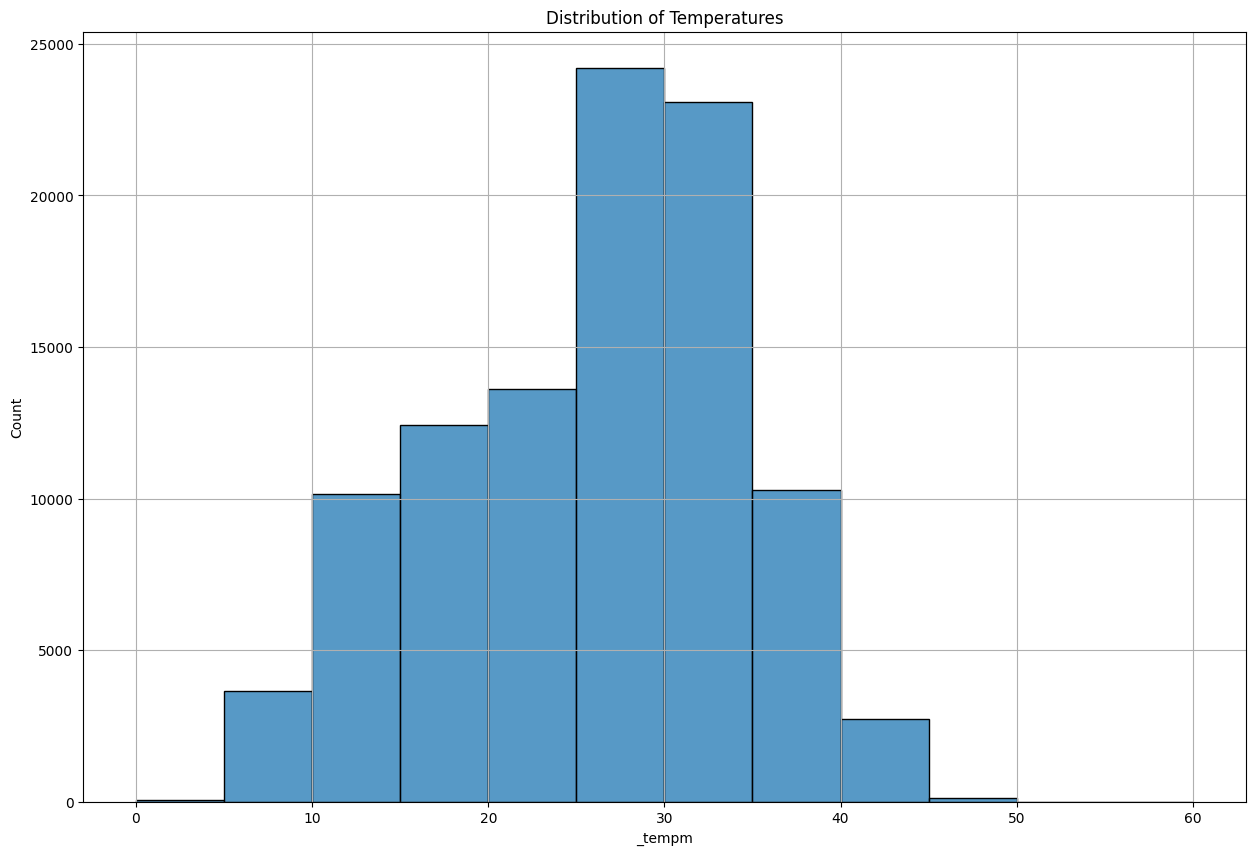

In [25]:
# plot to see the temperature varience
plt.figure(figsize=(15, 10))
sns.histplot(df['_tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

In [26]:
# set data index as datetime column
df.index = pd.to_datetime(df.datetime_utc)

# filter the columns by only the required_columns
required_cols = ['_dewptm', '_fog', '_hail', '_hum', '_rain', '_snow', '_tempm', '_thunder', '_tornado']
df = df[required_cols]
df.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0,0,0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0,0,0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0,0,0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0,0,0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0,0,0


In [27]:
# check number of nan values in dataframe
df.isna().sum()

_dewptm     621
_fog          0
_hail         0
_hum        757
_rain         0
_snow         0
_tempm      673
_thunder      0
_tornado      0
dtype: int64

In [28]:
# fill the nan values by upper row value
df = df.fillna(method='ffill')
df.tail()

C:\Users\prith\AppData\Local\Temp\ipykernel_7672\923546998.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
2017-04-24 06:00:00,17.0,0,0,25.0,0,0,34.0,0,0
2017-04-24 09:00:00,14.0,0,0,16.0,0,0,38.0,0,0
2017-04-24 12:00:00,12.0,0,0,14.0,0,0,36.0,0,0
2017-04-24 15:00:00,15.0,0,0,27.0,0,0,32.0,0,0
2017-04-24 18:00:00,15.0,0,0,30.0,0,0,30.0,0,0


In [29]:
df_final = df.resample('D').mean()
df_final.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm,_thunder,_tornado
datetime_utc,,,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333,0.0,0.0
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667,0.0,0.0
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667,0.0,0.0
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222,0.0,0.0
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000,0.0,0.0


In [30]:
df_final.isna().sum()

_dewptm     141
_fog        141
_hail       141
_hum        141
_rain       141
_snow       141
_tempm      141
_thunder    141
_tornado    141
dtype: int64

In [31]:
df_final = df_final.fillna(method='ffill')
df_final.isna().sum()

C:\Users\prith\AppData\Local\Temp\ipykernel_7672\3141159991.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_final = df_final.fillna(method='ffill')


_dewptm     0
_fog        0
_hail       0
_hum        0
_rain       0
_snow       0
_tempm      0
_thunder    0
_tornado    0
dtype: int64

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_final)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(df_final.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][6]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)


Train X shape: (5976, 10, 9)
Train Y shape: (5976,)
Test X shape: (1494, 10, 9)
Test Y shape: (1494,)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\prith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 128)        │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,513 (517.63 KB)

 Trainable params: 132,513 (517.63 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(r'E:\Weather Predict\best_model_weights.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0803 - val_loss: 0.0045
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0100 - val_loss: 0.0044
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0094 - val_loss: 0.0044
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0088 - val_loss: 0.0051
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0084 - val_loss: 0.0038
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0082 - val_loss: 0.0041
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0074 - val_loss: 0.0049
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0079 - val_loss: 0.0039
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - val_loss: 0.0036
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - val_loss: 0.0034
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0071 - val_loss: 0.0035
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.

In [36]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model(r'E:\Weather Predict\best_model_weights.keras')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022  
Test Loss: 0.002148543018847704


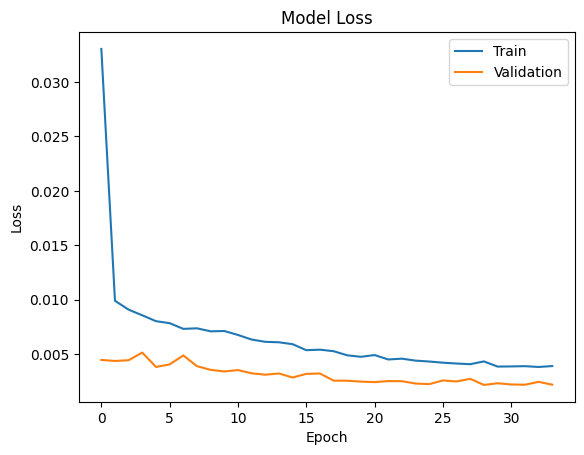

In [37]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Absolute Error (MAE): 0.03616754977948832
Mean Squared Error (MSE): 0.002148543571487446
Root Mean Squared Error (RMSE): 0.04635238474434132


In [39]:
# y_true values
test_y_copies = np.repeat(test_y.reshape(-1, 1), test_x.shape[-1], axis=-1)
true_temp = scaler.inverse_transform(test_y_copies)[:,6]

# predicted values
prediction = best_model.predict(test_x)
prediction_copies = np.repeat(prediction, 9, axis=-1)
predicted_temp = scaler.inverse_transform(prediction_copies)[:,6]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


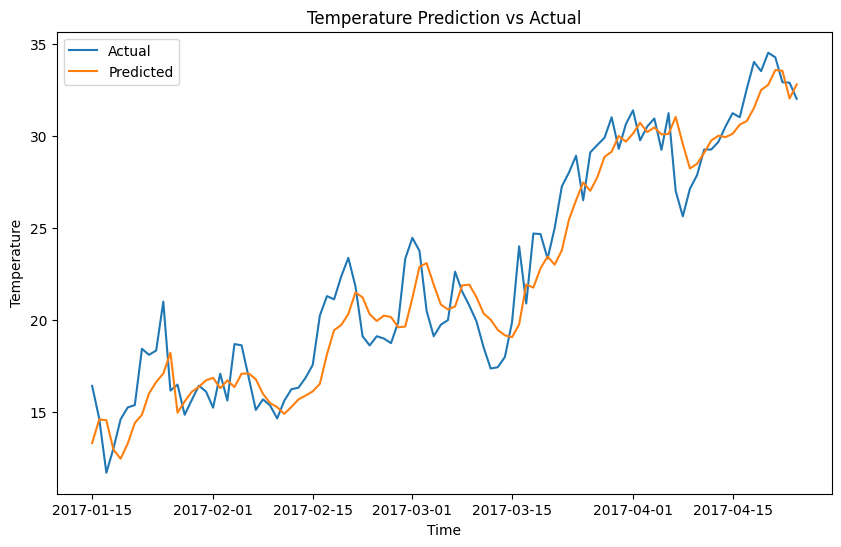

In [40]:
# Plotting predicted and actual temperatures
plt.figure(figsize=(10, 6))
plt.plot(df_final.index[-100:], true_temp[-100:], label='Actual')
plt.plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

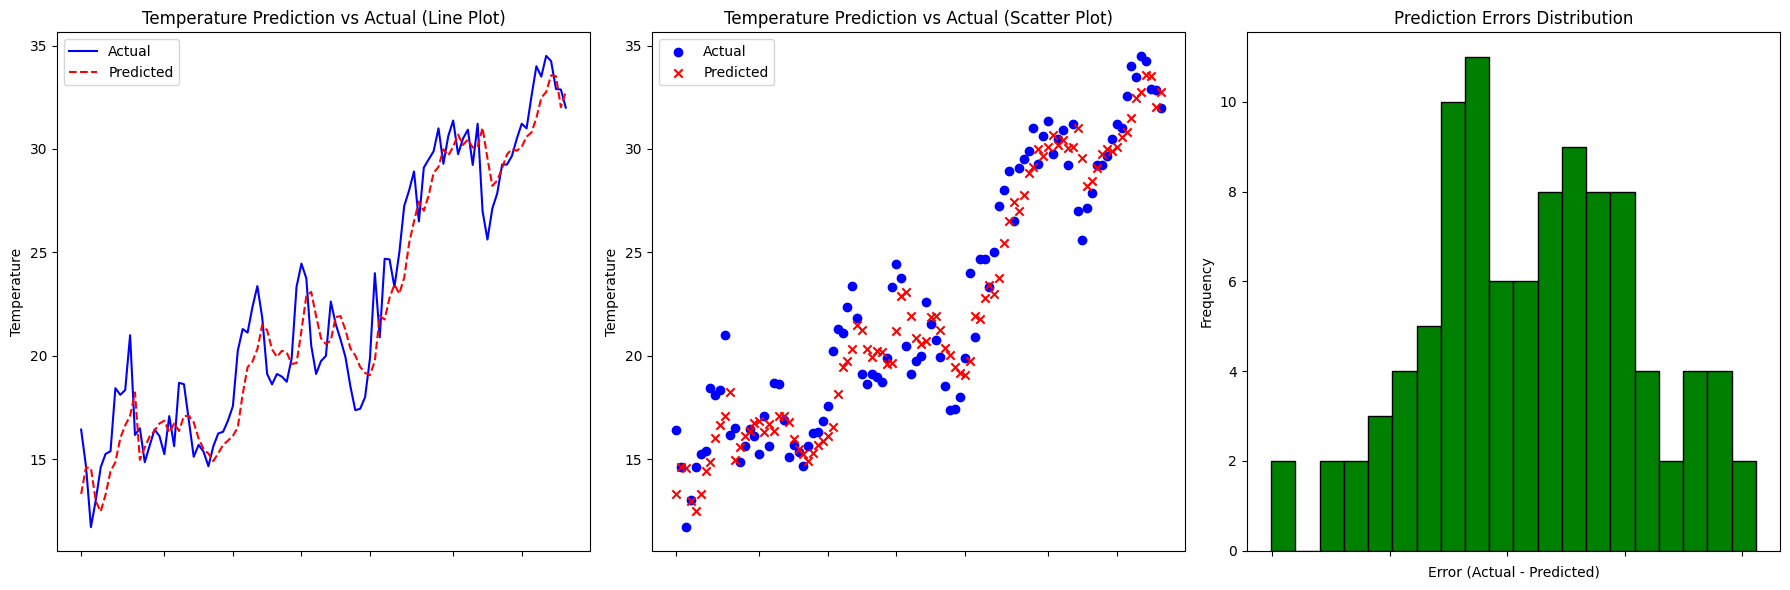

In [41]:
import matplotlib.pyplot as plt

# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot Actual vs Predicted temperature on the first axis (Line Plot)
axs[0].plot(df_final.index[-100:], true_temp[-100:], label='Actual', color='blue')
axs[0].plot(df_final.index[-100:], predicted_temp[-100:], label='Predicted', color='red', linestyle='--')
axs[0].set_title('Temperature Prediction vs Actual (Line Plot)')
axs[0].set_ylabel('Temperature')
axs[0].legend()

# Plot Actual vs Predicted temperature on the second axis (Scatter Plot)
axs[1].scatter(df_final.index[-100:], true_temp[-100:], label='Actual', color='blue')
axs[1].scatter(df_final.index[-100:], predicted_temp[-100:], label='Predicted', color='red', marker='x')
axs[1].set_title('Temperature Prediction vs Actual (Scatter Plot)')
axs[1].set_ylabel('Temperature')
axs[1].legend()
errors = [true - pred for true, pred in zip(true_temp[-100:], predicted_temp[-100:])]
axs[2].hist(errors, bins=20, color='green', edgecolor='black')
axs[2].set_title('Prediction Errors Distribution')
axs[2].set_xlabel('Error (Actual - Predicted)')
axs[2].set_ylabel('Frequency')


for ax in axs:
    ax.set_xticklabels([])

plt.tight_layout()

plt.show()


# Linear Regression Implementation

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Reshape the data for Linear Regression
flat_train_x = train_x.reshape(train_x.shape[0], -1)
flat_test_x = test_x.reshape(test_x.shape[0], -1)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(flat_train_x, train_y)

# Predict with Linear Regression
lr_predictions = lr_model.predict(flat_test_x)

# Calculate metrics for Linear Regression
lr_mse = mean_squared_error(test_y, lr_predictions)
lr_rmse = np.sqrt(lr_mse)

print("Linear Regression RMSE:", lr_rmse)


Linear Regression RMSE: 0.04451996510896138


# Random Forest Implementation

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(flat_train_x, train_y)

# Predict with Random Forest
rf_predictions = rf_model.predict(flat_test_x)

# Calculate metrics for Random Forest
rf_mse = mean_squared_error(test_y, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest RMSE:", rf_rmse)


Random Forest RMSE: 0.04509444914061059


# Feedforward Neural Network Implementation

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error

# Define the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(flat_train_x.shape[1],)),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1)  # Output layer for regression
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
mlp_model.summary()

# Train the model
mlp_history = mlp_model.fit(
    flat_train_x, train_y,
    epochs=50,  # You can adjust the number of epochs
    batch_size=64,  # Batch size
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1  # Print training progress
)

# Predict with the trained model
mlp_predictions = mlp_model.predict(flat_test_x)

# Calculate RMSE for MLP
mlp_mse = mean_squared_error(test_y, mlp_predictions)
mlp_rmse = np.sqrt(mlp_mse)

print(f"MLP RMSE: {mlp_rmse:.4f}")


c:\Users\prith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,969 (78.00 KB)

 Trainable params: 19,969 (78.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0686 - val_loss: 0.0040
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0137 - val_loss: 0.0035
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0107 - val_loss: 0.0034
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094 - val_loss: 0.0060
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092 - val_loss: 0.0031
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0028
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - val_loss: 0.0029
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0069 - val_loss: 0.0026
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0064 - val_loss: 0.0030
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 - val_loss: 0.0030
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - val_loss: 0.0024
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 - val_lo

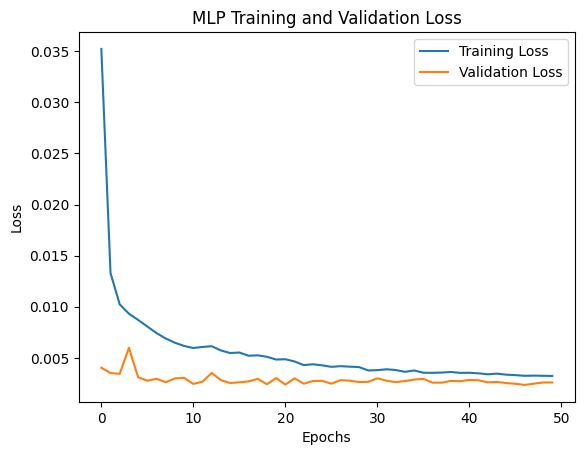

In [45]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model Comparison

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
LSTM RMSE: 0.04635238474434132 MAE: 0.03616754977948832 R²: 0.9479179056507702
Linear Regression RMSE: 0.04451996510896138 MAE: 0.03424261081273247 R²: 0.9519543685953283
Random Forest RMSE: 0.04509444914061059 MAE: 0.03485403908515494 R²: 0.9507064102012998
MLP RMSE: 0.04933038331786942 MAE: 0.03906852650416701 R²: 0.9410106983440293


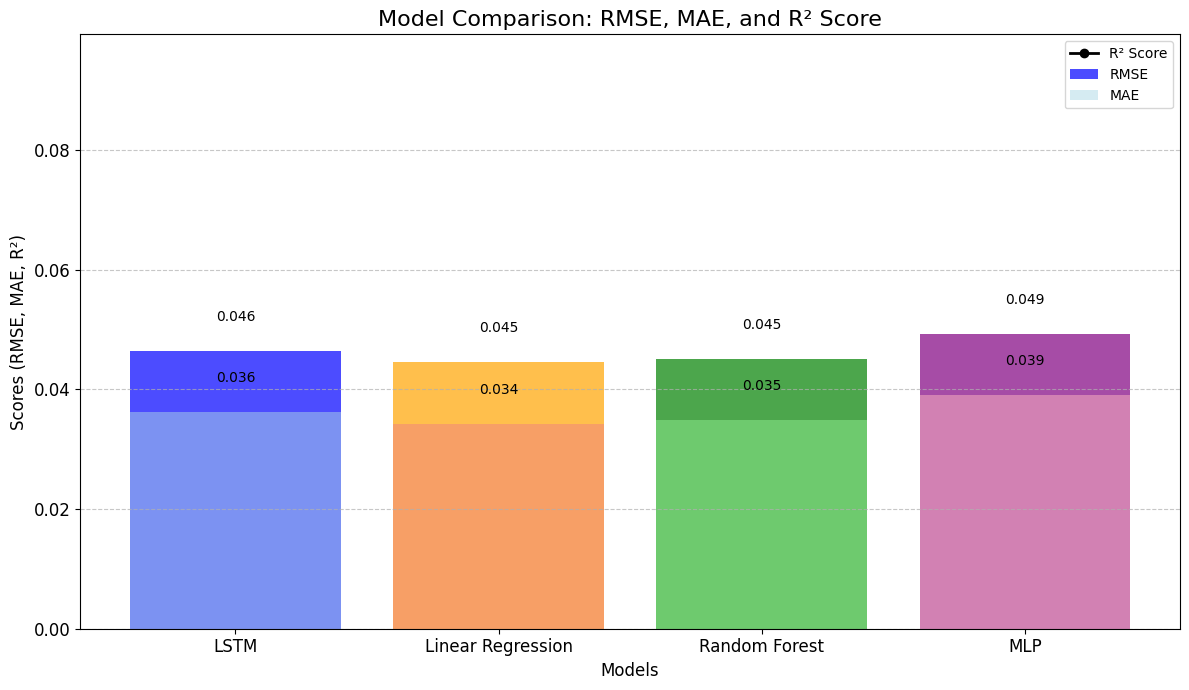

In [61]:
# Import required libraries
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Calculate RMSE, MAE, and R² Score for each model

# 1. LSTM RMSE, MAE, R²
lstm_predictions = best_model.predict(test_x)
lstm_rmse = np.sqrt(mean_squared_error(test_y, lstm_predictions))
lstm_mae = mean_absolute_error(test_y, lstm_predictions)
lstm_r2 = r2_score(test_y, lstm_predictions)

# 2. Linear Regression RMSE, MAE, R²
lr_predictions = lr_model.predict(test_x.reshape(test_x.shape[0], -1))
lr_rmse = np.sqrt(mean_squared_error(test_y, lr_predictions))
lr_mae = mean_absolute_error(test_y, lr_predictions)
lr_r2 = r2_score(test_y, lr_predictions)

# 3. Random Forest RMSE, MAE, R²
rf_predictions = rf_model.predict(test_x.reshape(test_x.shape[0], -1))
rf_rmse = np.sqrt(mean_squared_error(test_y, rf_predictions))
rf_mae = mean_absolute_error(test_y, rf_predictions)
rf_r2 = r2_score(test_y, rf_predictions)

# 4. Neural Network (MLP) RMSE, MAE, R²
mlp_predictions = mlp_model.predict(test_x.reshape(test_x.shape[0], -1))
mlp_rmse = np.sqrt(mean_squared_error(test_y, mlp_predictions))
mlp_mae = mean_absolute_error(test_y, mlp_predictions)
mlp_r2 = r2_score(test_y, mlp_predictions)

# Print RMSE, MAE, and R² values for all models
print("LSTM RMSE:", lstm_rmse, "MAE:", lstm_mae, "R²:", lstm_r2)
print("Linear Regression RMSE:", lr_rmse, "MAE:", lr_mae, "R²:", lr_r2)
print("Random Forest RMSE:", rf_rmse, "MAE:", rf_mae, "R²:", rf_r2)
print("MLP RMSE:", mlp_rmse, "MAE:", mlp_mae, "R²:", mlp_r2)

# Prepare data for bar plot (using RMSE for comparison)
models = ['LSTM', 'Linear Regression', 'Random Forest', 'MLP']
rmses = [lstm_rmse, lr_rmse, rf_rmse, mlp_rmse]
maes = [lstm_mae, lr_mae, rf_mae, mlp_mae]
r2s = [lstm_r2, lr_r2, rf_r2, mlp_r2]

# Create a bar chart for RMSE comparison
plt.figure(figsize=(12, 7))

# Plot RMSE values
plt.bar(models, rmses, color=['blue', 'orange', 'green', 'purple'], alpha=0.7, label='RMSE')

# Plot MAE values as a secondary bar chart
plt.bar(models, maes, color=['lightblue', 'lightcoral', 'lightgreen', 'lightpink'], alpha=0.5, label='MAE')

# Plot R² Score values as a line graph
plt.plot(models, r2s, marker='o', color='black', label='R² Score', linewidth=2)

# Add title and labels
plt.title('Model Comparison: RMSE, MAE, and R² Score', fontsize=16)
plt.ylabel('Scores (RMSE, MAE, R²)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0, max(rmses) + 0.05)  # Adjust y-axis for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with RMSE and MAE values
for i, (rmse, mae) in enumerate(zip(rmses, maes)):
    plt.text(i, rmse + 0.005, f'{rmse:.3f}', ha='center', fontsize=10, color='black')
    plt.text(i, mae + 0.005, f'{mae:.3f}', ha='center', fontsize=10, color='black')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
